# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
# print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print("Retrieving Data")
print("-----------------")

x=0
# y=1
for city in cities:
    try:
        city_query_url = query_url + city
        x=x+1
        print(f"Retrieving Record {x} | {city}")
    #     print(city_query_url)
        data = requests.get(city_query_url).json()
    #     print(data)

        #assign temporary values
        cn = data["name"]
        cloud = data["clouds"]["all"]
        ctry = data["sys"]["country"]
        dt = data["dt"]
        hm = data["main"]["humidity"]
        lt = data["coord"]["lat"]
        ln = data["coord"]["lon"]
        mt = data["main"]["temp_max"]
        ws = data["wind"]["speed"]
    
    

        
        City.append(cn)
        Cloudiness.append(cloud)
        Country.append(ctry)
        Date.append(dt)
        Humidity.append(hm)
        Lat.append(lt)
        Lng.append(ln)
        Max_Temp.append(mt)
        Wind_Speed.append(ws)
        
    except KeyError:
        print(f"City not available... skip!")
        
print("-----------------")
print("Retrival Compete")

Retrieving Data
-----------------
Retrieving Record 1 | maitum
Retrieving Record 2 | boa esperanca
Retrieving Record 3 | barentsburg
City not available... skip!
Retrieving Record 4 | cabo san lucas
Retrieving Record 5 | bluff
Retrieving Record 6 | atuona
Retrieving Record 7 | avarua
Retrieving Record 8 | new norfolk
Retrieving Record 9 | bathsheba
Retrieving Record 10 | inirida
Retrieving Record 11 | torbay
Retrieving Record 12 | ilo
Retrieving Record 13 | putina
Retrieving Record 14 | hobart
Retrieving Record 15 | cabittaogan
Retrieving Record 16 | hilo
Retrieving Record 17 | arraial do cabo
Retrieving Record 18 | bredasdorp
Retrieving Record 19 | cidreira
Retrieving Record 20 | shetpe
Retrieving Record 21 | busselton
Retrieving Record 22 | ushuaia
Retrieving Record 23 | cape town
Retrieving Record 24 | jiran
Retrieving Record 25 | flin flon
Retrieving Record 26 | fort wellington
Retrieving Record 27 | taolanaro
City not available... skip!
Retrieving Record 28 | parker
Retrieving Reco

Retrieving Record 233 | poum
Retrieving Record 234 | rundu
Retrieving Record 235 | srednekolymsk
Retrieving Record 236 | saskylakh
Retrieving Record 237 | tuktoyaktuk
Retrieving Record 238 | airai
Retrieving Record 239 | dalbandin
Retrieving Record 240 | krasyliv
Retrieving Record 241 | sur
Retrieving Record 242 | lac du bonnet
Retrieving Record 243 | tateyama
Retrieving Record 244 | cabedelo
Retrieving Record 245 | mahebourg
Retrieving Record 246 | atar
Retrieving Record 247 | lasa
Retrieving Record 248 | labrea
Retrieving Record 249 | nuuk
Retrieving Record 250 | meulaboh
Retrieving Record 251 | saint-augustin
Retrieving Record 252 | arlit
Retrieving Record 253 | porto novo
Retrieving Record 254 | mogadishu
Retrieving Record 255 | halifax
Retrieving Record 256 | tumannyy
City not available... skip!
Retrieving Record 257 | princeville
Retrieving Record 258 | hamilton
Retrieving Record 259 | kahului
Retrieving Record 260 | westpunt
City not available... skip!
Retrieving Record 261 | ok

Retrieving Record 464 | vila franca do campo
Retrieving Record 465 | nguiu
City not available... skip!
Retrieving Record 466 | vaitupu
City not available... skip!
Retrieving Record 467 | cumaribo
City not available... skip!
Retrieving Record 468 | bereda
Retrieving Record 469 | hailar
Retrieving Record 470 | yerbogachen
Retrieving Record 471 | maceio
Retrieving Record 472 | fortuna
Retrieving Record 473 | southend-on-sea
Retrieving Record 474 | katherine
Retrieving Record 475 | talnakh
Retrieving Record 476 | jardim
Retrieving Record 477 | dalvik
Retrieving Record 478 | novobelokatay
Retrieving Record 479 | isla mujeres
Retrieving Record 480 | pineville
Retrieving Record 481 | vavuniya
Retrieving Record 482 | gigmoto
Retrieving Record 483 | sitka
Retrieving Record 484 | sorland
Retrieving Record 485 | santa lucia
Retrieving Record 486 | marawi
Retrieving Record 487 | el doncello
Retrieving Record 488 | cherskiy
Retrieving Record 489 | podyuga
Retrieving Record 490 | kavaratti
Retrievin

In [5]:
#   name = data["name"]
#   print(name)
    

# query_params = {
#     "appid": weather_api_key,
#     "q": city,
#     "units": units
# }
# weather_response = requests.get(url, params=query_params)
# weather_json = weather_response.json() 
# print(Cloudiness)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# convert dates and write to csv
weather_df = pd.DataFrame({"City": City, "Cloudiness": Cloudiness, "Country": Country, "Date": Date, "Humidity": Humidity, "Latitude":  Lat, "Longitude":  Lng, "Max Temp": Max_Temp, "Wind Speed": Wind_Speed})

weather_df["Date"] = pd.to_datetime(weather_df["Date"], unit = "s")

weather_df.to_csv("city_output.csv")

weather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Maitum,75,PH,2020-10-27 02:34:57,74,6.04,124.50,84.20,2.24
1,Boa Esperança,68,BR,2020-10-27 02:34:57,80,-21.09,-45.57,68.43,3.09
2,Cabo San Lucas,20,MX,2020-10-27 02:32:40,69,22.89,-109.91,82.40,11.41
3,Bluff,20,NZ,2020-10-27 02:32:19,64,-46.60,168.33,57.00,8.99
4,Atuona,49,PF,2020-10-27 02:32:19,76,-9.80,-139.03,78.78,22.35
...,...,...,...,...,...,...,...,...,...
559,Panzhihua,27,CN,2020-10-27 02:36:16,58,26.59,101.71,77.77,0.87
560,Sovetskiy,100,RU,2020-10-27 02:36:16,94,61.36,63.58,21.25,12.08
561,Laguna,1,US,2020-10-27 02:33:06,8,38.42,-121.42,69.01,12.75
562,Galveston,1,US,2020-10-27 02:32:07,78,29.37,-94.97,75.99,12.75


In [7]:
weather_df.describe()

,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,50.136525,73.234043,20.863918,11.163511,58.651755,7.429840
std,39.353805,19.828264,31.814674,90.552406,21.557748,5.215762
min,0.000000,8.000000,-54.800000,-179.170000,-5.800000,0.310000
25%,5.750000,62.000000,-4.290000,-70.125000,44.600000,3.547500
50%,49.000000,78.000000,25.250000,15.435000,64.400000,5.950000
75%,90.000000,88.000000,46.757500,89.207500,76.880000,10.010000
max,100.000000,100.000000,78.220000,179.320000,91.400000,42.500000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
hum_100 = weather_df.loc[weather_df["Humidity"] >= 100]
hum_100

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
35,Broome,90,US,2020-10-27 02:35:01,100,42.25,-75.83,48.99,12.75
45,Port-Cartier,90,CA,2020-10-27 02:35:02,100,50.03,-66.87,30.99,5.82
47,Jamestown,90,US,2020-10-27 02:32:35,100,42.10,-79.24,44.01,2.84
63,Bethel,90,US,2020-10-27 02:31:54,100,41.37,-73.41,54.00,1.52
74,Acajutla,85,SV,2020-10-27 02:32:54,100,13.59,-89.83,71.01,4.90
128,Havre-St-Pierre,90,CA,2020-10-27 02:30:12,100,50.23,-63.60,30.20,6.93
189,Tavricheskoye,75,RU,2020-10-27 02:35:21,100,54.59,73.64,39.20,17.90
208,Ironton,90,US,2020-10-27 02:35:24,100,38.54,-82.68,55.00,5.82
211,Nicoya,75,CR,2020-10-27 02:35:25,100,10.15,-85.45,75.20,2.24
255,Edson,90,CA,2020-10-27 02:35:31,100,53.58,-116.44,35.60,3.36


In [9]:
#  Get the indices of cities that have humidity over 100%.

dropped = weather_df.drop(hum_100.index, inplace=False)
dropped

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Maitum,75,PH,2020-10-27 02:34:57,74,6.04,124.50,84.20,2.24
1,Boa Esperança,68,BR,2020-10-27 02:34:57,80,-21.09,-45.57,68.43,3.09
2,Cabo San Lucas,20,MX,2020-10-27 02:32:40,69,22.89,-109.91,82.40,11.41
3,Bluff,20,NZ,2020-10-27 02:32:19,64,-46.60,168.33,57.00,8.99
4,Atuona,49,PF,2020-10-27 02:32:19,76,-9.80,-139.03,78.78,22.35
...,...,...,...,...,...,...,...,...,...
559,Panzhihua,27,CN,2020-10-27 02:36:16,58,26.59,101.71,77.77,0.87
560,Sovetskiy,100,RU,2020-10-27 02:36:16,94,61.36,63.58,21.25,12.08
561,Laguna,1,US,2020-10-27 02:33:06,8,38.42,-121.42,69.01,12.75
562,Galveston,1,US,2020-10-27 02:32:07,78,29.37,-94.97,75.99,12.75


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

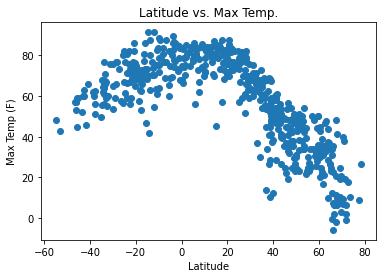

In [11]:
x1 = weather_df["Latitude"]
y1 = weather_df["Max Temp"]
plt.scatter(x1, y1)

plt.title("Latitude vs. Max Temp.")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("lat_vs_maxtemp")

## Latitude vs. Humidity Plot

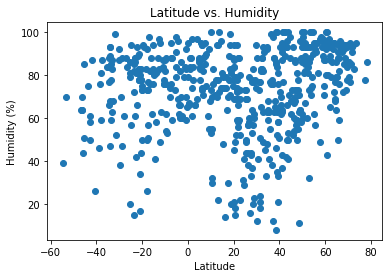

In [12]:
x2 = weather_df["Latitude"]
y2 = weather_df["Humidity"]
plt.scatter(x2, y2)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_vs_humidity")

## Latitude vs. Cloudiness Plot

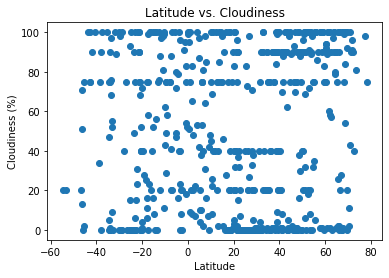

In [13]:
x3 = weather_df["Latitude"]
y3 = weather_df["Cloudiness"]
plt.scatter(x3, y3)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_vs_cloudiness")

## Latitude vs. Wind Speed Plot

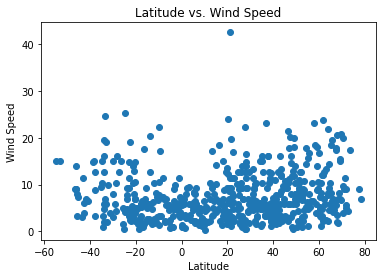

In [14]:
x4 = weather_df["Latitude"]
y4 = weather_df["Wind Speed"]
plt.scatter(x4, y4)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("lat_vs_windspeed")

## Linear Regression

In [15]:
north_df = weather_df.loc[weather_df["Latitude"] > 0]
north_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Maitum,75,PH,2020-10-27 02:34:57,74,6.04,124.50,84.20,2.24
2,Cabo San Lucas,20,MX,2020-10-27 02:32:40,69,22.89,-109.91,82.40,11.41
7,Bathsheba,75,BB,2020-10-27 02:32:26,78,13.22,-59.52,78.80,17.22
8,Inírida,100,CO,2020-10-27 02:34:57,97,3.87,-67.92,74.75,3.49
9,Torbay,90,CA,2020-10-27 02:33:14,59,47.67,-52.73,37.99,8.05
...,...,...,...,...,...,...,...,...,...
558,Miles City,1,US,2020-10-27 02:33:13,67,46.41,-105.84,19.40,5.82
559,Panzhihua,27,CN,2020-10-27 02:36:16,58,26.59,101.71,77.77,0.87
560,Sovetskiy,100,RU,2020-10-27 02:36:16,94,61.36,63.58,21.25,12.08
561,Laguna,1,US,2020-10-27 02:33:06,8,38.42,-121.42,69.01,12.75


In [16]:
south_df = weather_df.loc[weather_df["Latitude"] < 0]
south_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
1,Boa Esperança,68,BR,2020-10-27 02:34:57,80,-21.09,-45.57,68.43,3.09
3,Bluff,20,NZ,2020-10-27 02:32:19,64,-46.60,168.33,57.00,8.99
4,Atuona,49,PF,2020-10-27 02:32:19,76,-9.80,-139.03,78.78,22.35
5,Avarua,100,CK,2020-10-27 02:29:38,83,-21.21,-159.78,71.60,13.87
6,New Norfolk,75,AU,2020-10-27 02:32:16,50,-42.78,147.06,60.01,4.00
...,...,...,...,...,...,...,...,...,...
531,Kaliua,80,TZ,2020-10-27 02:36:12,79,-5.06,31.79,68.76,0.69
536,Cap Malheureux,4,MU,2020-10-27 02:36:13,73,-19.98,57.61,75.00,5.01
547,Yeppoon,75,AU,2020-10-27 02:32:49,61,-23.13,150.73,82.40,9.17
551,Departamento de Maldonado,0,UY,2020-10-27 02:35:26,66,-34.67,-54.92,55.40,10.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

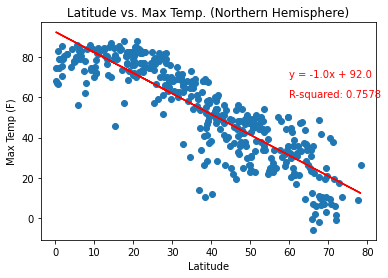

In [17]:
x5 = north_df["Latitude"]
y5 = north_df["Max Temp"]
plt.scatter(x5, y5)

plt.title("Latitude vs. Max Temp. (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

np.polyfit(x5, y5, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x5, y5)
slope, intercept

predict = x5*slope + intercept
predict

line_eq = f"y = {round(slope)}x + {round(intercept)}"
r_val = pearsonr(x5, y5)[0]
r_sq =  r_val ** 2

plt.plot(x5, predict, color="red")
plt.annotate(line_eq, (60, 70), color="red")
plt.annotate(f"R-squared: {round(r_sq, 4)}", (60,60), color="red")

plt.savefig("N_lat_vs_maxtemp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

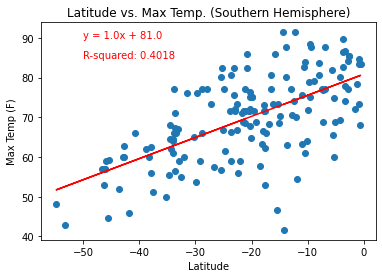

In [18]:
x6 = south_df["Latitude"]
y6 = south_df["Max Temp"]
plt.scatter(x6, y6)


plt.title("Latitude vs. Max Temp. (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

np.polyfit(x6, y6, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x6, y6)
slope, intercept

s_mt_lat_predict = x6*slope + intercept

line_eq6 = f"y = {round(slope)}x + {round(intercept)}"
r_val6 = pearsonr(x6, y6)[0]
r_sq6 =  r_val6 ** 2

plt.plot(x6, s_mt_lat_predict, color="red")
plt.annotate(line_eq6, (-50, 90), color="red")
plt.annotate(f"R-squared: {round(r_sq6, 4)}", (-50, 85), color="red")

plt.savefig("S_lat_vs_maxtemp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

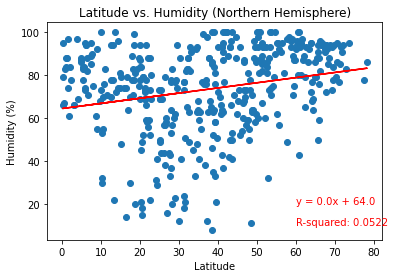

In [19]:
x7 = north_df["Latitude"]
y7 = north_df["Humidity"]
plt.scatter(x7, y7)

plt.title("Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

np.polyfit(x7, y7, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x7, y7)
slope, intercept

n_hum_lat_predict = x7*slope + intercept

line_eq7 = f"y = {round(slope)}x + {round(intercept)}"
r_val7 = pearsonr(x7, y7)[0]
r_sq7 =  r_val7 ** 2

plt.plot(x7, n_hum_lat_predict, color="red")
plt.annotate(line_eq7, (60, 20), color="red")
plt.annotate(f"R-squared: {round(r_sq7, 4)}", (60,10), color="red")

plt.savefig("N_lat_vs_humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

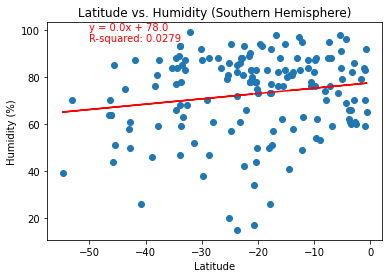

In [20]:
x8 = south_df["Latitude"]
y8 = south_df["Humidity"]
plt.scatter(x8, y8)


plt.title("Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

np.polyfit(x8, y8, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x8, y8)
slope, intercept

s_hum_lat_predict = x8*slope + intercept

line_eq8 = f"y = {round(slope)}x + {round(intercept)}"
r_val8 = pearsonr(x8, y8)[0]
r_sq8 =  r_val8 ** 2

plt.plot(x8, s_hum_lat_predict, color="red")
plt.annotate(line_eq8, (-50, 100), color="red")
plt.annotate(f"R-squared: {round(r_sq8, 4)}", (-50, 95), color="red")

plt.savefig("S_lat_vs_humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

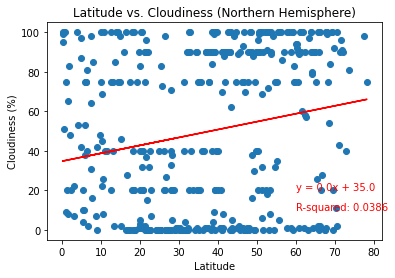

In [21]:
x9 = north_df["Latitude"]
y9 = north_df["Cloudiness"]
plt.scatter(x9, y9)

plt.title("Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

np.polyfit(x9, y9, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x9, y9)
slope, intercept

n_cloud_lat_predict = x9*slope + intercept

line_eq9 = f"y = {round(slope)}x + {round(intercept)}"
r_val9 = pearsonr(x9, y9)[0]
r_sq9 =  r_val9 ** 2

plt.plot(x9, n_cloud_lat_predict, color="red")
plt.annotate(line_eq9, (60, 20), color="red")
plt.annotate(f"R-squared: {round(r_sq9, 4)}", (60,10), color="red")

plt.savefig("N_lat_vs_cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

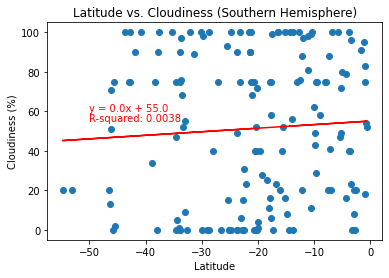

In [22]:
x10 = south_df["Latitude"]
y10 = south_df["Cloudiness"]
plt.scatter(x10, y10)


plt.title("Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

np.polyfit(x10, y10, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x10, y10)
slope, intercept

s_cloud_lat_predict = x10*slope + intercept

line_eq10 = f"y = {round(slope)}x + {round(intercept)}"
r_val10 = pearsonr(x10, y10)[0]
r_sq10 =  r_val10 ** 2

plt.plot(x10, s_cloud_lat_predict, color="red")
plt.annotate(line_eq10, (-50, 60), color="red")
plt.annotate(f"R-squared: {round(r_sq10, 4)}", (-50, 55), color="red")

plt.savefig("S_lat_vs_cloud")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

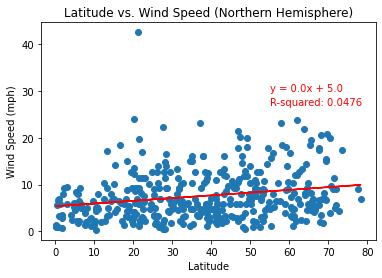

In [23]:
x11 = north_df["Latitude"]
y11 = north_df["Wind Speed"]
plt.scatter(x11, y11)

plt.title("Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

np.polyfit(x11, y11, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x11, y11)
slope, intercept

n_ws_lat_predict = x11*slope + intercept

line_eq11 = f"y = {round(slope)}x + {round(intercept)}"
r_val11 = pearsonr(x11, y11)[0]
r_sq11 =  r_val11 ** 2

plt.plot(x11, n_ws_lat_predict, color="red")
plt.annotate(line_eq11, (55, 30), color="red")
plt.annotate(f"R-squared: {round(r_sq11, 4)}", (55,27), color="red")

plt.savefig("N_lat_vs_ws")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

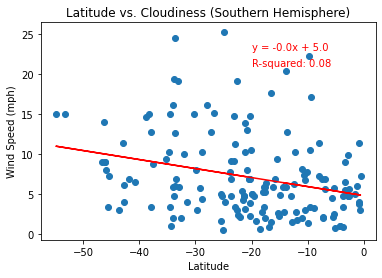

In [24]:
x12 = south_df["Latitude"]
y12 = south_df["Wind Speed"]
plt.scatter(x12, y12)


plt.title("Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

np.polyfit(x12, y12, 1)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x12, y12)
slope, intercept

s_ws_lat_predict = x12*slope + intercept

line_eq12 = f"y = {round(slope)}x + {round(intercept)}"
r_val12 = pearsonr(x12, y12)[0]
r_sq12 =  r_val12 ** 2

plt.plot(x12, s_ws_lat_predict, color="red")
plt.annotate(line_eq12, (-20, 23), color="red")
plt.annotate(f"R-squared: {round(r_sq12, 4)}", (-20, 21), color="red")

plt.savefig("S_lat_vs_ws")